## Table of contents 
1. [Importing dataset]()
2. [Explore the data]()
3. [Preprocess the data]()
5. [Build the model]()
   - [set up the layers]()
   - compile the model
6. Train the model
   - feed  the model
   - valuation accuracy
   - Make predictions
   - Verify predictions
   - Use the trained model
    

In [64]:
# Tensorflow and tf.keras
import os
import pandas as pd
import tensorflow as tf
import PIL
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.5.0


In [79]:
from  keras.layers import Dense
#from keras.models import Sequential
tf.keras.Sequential(layers=None, name=None)
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import warnings
from keras.layers import MaxPooling2D, Flatten, Conv2D


In [4]:
DATADIR = "./chest_xray"

In [5]:
train_dir = os.path.join(DATADIR, 'train')
val_dir = os.path.join(DATADIR, 'val')
test_dir = os.path.join(DATADIR, 'test')

In [6]:
pneumonia_train_dir = os.path.join(train_dir,'PNEUMONIA')
pneumonia_val_dir = os.path.join(val_dir, 'PNEUMONIA')
pneumonia_test_dir = os.path.join(test_dir, 'PNEUMONIA')

In [7]:
normal_train_dir = os.path.join(train_dir, 'NORMAL')
normal_val_dir = os.path.join(val_dir, 'NORMAL')
normal_test_dir = os.path.join(test_dir, 'NORMAL')

In [8]:
# check the dimensions of the data set
pneumonia_train_images = len(os.listdir(pneumonia_train_dir))
pneumonia_val_images = len(os.listdir(pneumonia_val_dir))
pneumonia_test_images = len(os.listdir(pneumonia_test_dir))

In [9]:
normal_train_images = len(os.listdir(normal_train_dir))
normal_val_images = len(os.listdir(normal_val_dir))
normal_test_images = len(os.listdir(normal_test_dir))

In [10]:
print(f'Total training images: {pneumonia_train_images + normal_train_images}')
print(f'Pneumonia: {pneumonia_train_images}')
print(f'Noraml: {normal_train_images}')
print('\n')
print('*'*30)

print(f'Total validation images: {pneumonia_val_images + normal_val_images}')
print(f'Pneumomian: {pneumonia_val_images}')
print(f'Normal: {normal_val_images}')
print('\n')
print('*'*30)
#print('\n')
print(f'Total test images: {pneumonia_test_images + normal_test_images}')
print(f'Pneumonia test images: {pneumonia_test_images}')
print(f' Nomal test images: {normal_test_images}')

Total training images: 10448
Pneumonia: 7758
Noraml: 2690


******************************
Total validation images: 16
Pneumomian: 8
Normal: 8


******************************
Total test images: 1248
Pneumonia test images: 780
 Nomal test images: 468


In [27]:
pneumonia = sum([pneumonia_train_images, pneumonia_val_images, pneumonia_test_images])
normal = sum([normal_train_images, normal_val_images, normal_test_images])



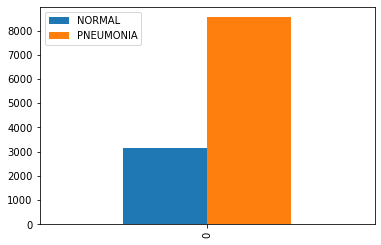

In [67]:
category = ["NORMAL", "PNEUMONIA"]
dic_list = {'NORMAL': normal, "PNEUMONIA": pneumonia}
#fig, ax = plt.subplots( figsize=(10, 6))
df = pd.DataFrame(dic_list, index = np.arange(len(dic_list)-1))
df.head()
df.plot(kind='bar')
#ax.xticks(np.arange(len(category)), category, rot=45)
plt.show()

In [65]:
train_datagen = ImageDataGenerator(
            rescale = 1./255,
            shear_range=0.2,
            zoom_range = 0.2,
            horizontal_flip = True)

In [68]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
                                        'chest_xray/chest_xray/train',
                                    target_size=(64,64),
                                    batch_size = 64,
                                    class_mode ='binary')

validation_generator = test_datagen.flow_from_directory('chest_xray/chest_xray/test',
                                                       target_size= (64, 64),
                                                       batch_size = 64,
                                                       class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Show some images after data augmentation

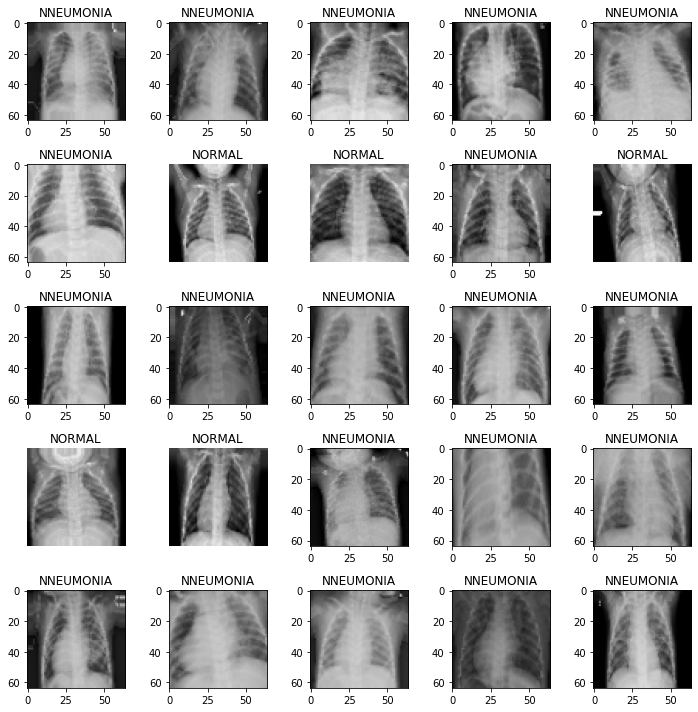

In [69]:
images_batch, label_batch = next(iter(train_generator))

def show_batch(images_batch, label_batch):
    plt.figure(figsize=(10,10))
    for i in range(0, 25):
        ax= plt.subplot(5, 5, i+1)
        plt.imshow(images_batch[i])
        if label_batch[i]:
            plt.title("NNEUMONIA")
        else:
            plt.title('NORMAL')
            plt.axis('off')
    plt.tight_layout()
show_batch(images_batch, label_batch)

**The shape of the images**

In [70]:
train_generator.image_shape

(64, 64, 3)


**Clasess of the images**

In [71]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

**Define Parameter**

The wieghts are updated in the training with a step size or learning rate. Learning rate is hyperparameter  used in the 
training of neural networks that has small positive value.

In [ ]:
EPOCHS = 20
INIT_LR = 1e-3
Batch_sizes= 15
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3


In [ ]:
Label = np.array([Label])

**Building Model Archticture**

In [ ]:
input _shape=(64,64, 3)

In [ ]:
def relu(input):
    """ Define relu activation funtion"""
    # Calculate the value for the output of the relue function: output
    output = max(0, input)
    # Retrun the value as calcualted
    return  output

In [ ]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):
    # Calculate node 0 value
    node_0_input = (input_data_row * weight[])